# Explore Weather Trends

In [ ]:
# SQL query to download csv file 
SELECT * FROM city_data 
SELECT * FROM city_list
SELECT * FROM global_data

In [3]:
import pandas as pd

In [4]:
#reading csv file using pandas
city_data=pd.read_csv('city_data.csv')
city_list=pd.read_csv('city_list.csv')
global_data=pd.read_csv('global_data.csv')

In [71]:
#checking the columns of the data 
city_data.columns

Index(['city', 'country', 'avg_temp'], dtype='object')

In [5]:
#making column 'year' to be an index
city_data.index=city_data.year
city_data=city_data.drop(['year'], axis=1)

## Data of Seoul

In [6]:
#getting data of Seoul and drop columns other than temperature 
seoul_data=city_data[city_data.city=='Seoul']
seoul_data=seoul_data.drop(['city'], axis=1)
seoul_data=seoul_data.drop(['country'], axis=1)

In [29]:
#rename the column : avg_temp -> Seoul
seoul_data.columns=['Seoul']
seoul_data.head()

,Seoul
year,
1839,9.47
1840,10.21
1841,9.44
1842,10.13
1843,10.33


In [34]:
#getting the moving average of Seoul and remove NaN
seoul_10=seoul_data.rolling(window=10).mean().dropna()
seoul_10.head()

,Seoul
year,
1848,10.150
1849,10.242
1850,10.190
1851,10.179
1852,10.118


## Data of Global

In [9]:
#making column 'year' to be an index
global_data.index=global_data.year
global_data=global_data.drop(['year'], axis=1)

In [28]:
#rename the column : avg_temp -> global
global_data.columns=['global']
global_data.head()

,global
year,
1750,8.72
1751,7.98
1752,5.78
1753,8.39
1754,8.47


In [35]:
#getting the moving average of Seoul and remove NaN
global_10=global_data.rolling(window=10).mean().dropna()
global_10.head()

,global
year,
1759,8.030
1760,7.877
1761,7.956
1762,8.239
1763,8.150


## Data of Canada

In [15]:
#getting data of Canada and drop columns other than temperature and remove NaN
canada_data=city_data[city_data.country=='Canada']
canada_data=canada_data.drop(['country'], axis=1)
canada_data=canada_data.dropna()
canada_data.head()

,city,avg_temp
year,,
1743,Kingston,0.63
1744,Kingston,9.04
1745,Kingston,-3.36
1750,Kingston,6.90
1751,Kingston,7.51


In [124]:
#checking the cities in Canada 
set(canada_data.city)

{'Kingston', 'London', 'Montreal', 'Ottawa', 'Toronto', 'Victoria'}

In [ ]:
canada_data=canada_data.drop(['city'], axis=1)

In [30]:
#rename the column : avg_temp -> Canada 
canada_data.columns=['Canada']
canada_data.head()

,Canada
year,
1743,-0.204
1744,8.404
1745,-4.218
1750,6.200
1751,6.782


In [36]:
#sorting the data by year 
canada_data=canada_data.sort_index()
canada_data.head(10)

,Canada
year,
1743,-0.204
1744,8.404
1745,-4.218
1750,6.200
1751,6.782
1752,-1.416
1753,5.672
1754,5.844
1755,2.606


In [19]:
#getting the mean of Canada's temperature by the year 
canada_data=canada_data.groupby('year').mean()

In [37]:
#getting the moving average of Canada and remove NaN
canada_10=canada_data.rolling(window=10).mean().dropna()

In [38]:
canada_10.head()

,Canada
year,
1756,3.5852
1757,4.1054
1758,3.6972
1759,4.6360
1760,4.3820


## Data of Toronto

In [16]:
#getting data of Toronto and drop columns other than temperature and remove NaN
toronto_data=canada_data[canada_data.city=='Toronto']
toronto_data=toronto_data.drop(['city'], axis=1)
toronto_data=toronto_data.dropna()
toronto_data.head()

,avg_temp
year,
1743,-0.11
1744,8.38
1745,-3.96
1750,6.29
1751,6.84


In [31]:
#rename the column : avg_temp -> Toronto
toronto_data.columns=['Toronto']
toronto_data.head()

,Toronto
year,
1743,-0.11
1744,8.38
1745,-3.96
1750,6.29
1751,6.84


In [33]:
#getting the moving average of Toronto and remove NaN
toronto_10=toronto_data.rolling(window=10).mean().dropna()
toronto_10.head()

,Toronto
year,
1756,3.722
1757,4.246
1758,3.845
1759,4.768
1760,4.513


## Merge the Data 

In [39]:
#merging Seoul data and global data without NaN
seoul_and_global=pd.concat([seoul_10, global_10], axis=1).dropna()
seoul_and_global.head()

,Seoul,global
year,,
1848,10.150,7.943
1849,10.242,7.978
1850,10.190,7.988
1851,10.179,8.037
1852,10.118,8.045


In [40]:
#merging Toronto data and Canada data without NaN
toronto_and_canada=pd.concat([toronto_10, canada_10], axis=1).dropna()
toronto_and_canada.head()

,Toronto,Canada
year,,
1756,3.722,3.5852
1757,4.246,4.1054
1758,3.845,3.6972
1759,4.768,4.6360
1760,4.513,4.3820


## Visualization of the Data 

In [1]:
import matplotlib.pyplot as plt
import seaborn as sb

Text(0.5, 1.0, 'The moving average of temperature in Seoul and global')

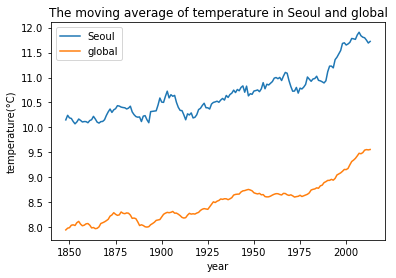

In [41]:
#making visualization of Seoul and global data 
seoul_and_global.plot()
plt.ylabel("temperature(°C)")
plt.title("The moving average of temperature in Seoul and global")

Text(0.5, 1.0, 'The moving average of temperature in Toronto and Canada')

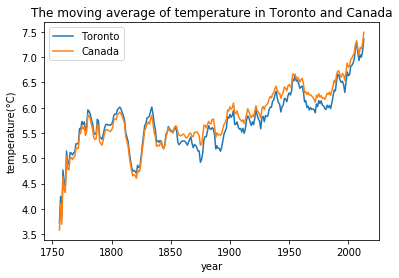

In [42]:
#making visualization of Toronto and Canada data 
toronto_and_canada.plot()
plt.ylabel("temperature(°C)")
plt.title("The moving average of temperature in Toronto and Canada")

## Observations
### 1) The temperature is getting higher in both case, Seoul and global.
### 2) The temperature of Seoul is higher than that of global from 1850 to 2000.
### 3) Since 2000s, the temperature of Canada is higher than that of Toronto.
### 4) The current temperature of Canada and Toronto is higher than that of 1750s.